In [1]:
import pandas as pd
import warnings
import numpy as np
warnings.filterwarnings(action="ignore")
from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import accuracy_score
from sklearn import metrics
#from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

# Preparing the data

In [2]:
df_bkp=pd.read_csv('data/jogos2017.csv')

In [3]:
df_bkp=df_bkp.drop(columns='Unnamed: 0', axis=1)

In [4]:
df=df_bkp[['time_casa','time_visitante','resultado']]

In [5]:
rkn={'Flamengo':11.95,
     'Corinthians': 14.32,
     'Fluminense':11.66,
     'Palmeiras':14.72,
     'Cruzeiro':14.20,
      'Bahia':6.69,
     'Ponte Preta':9.07,
     'Avaí':5.89,
     'Grêmio':15.03,
     'Coritiba': 9.41,
     'Santos': 14.57,
     'Atlético GO': 5.44,
     'Chapecoense': 7.59,
     'Vasco':10.04,
     'Atlético MG':14.31,
     'Atlético PR': 11.01,
     'Vitória': 7.54,
     'Botafogo':10.93,
     'Sport':8.01,
     'São Paulo':12.43
    }

In [6]:
#Variavel resultado está 
contador=0
for n in range (380):
    df['resultado'][contador]=df['resultado'][contador].replace("-"," ")
    contador+=1

In [7]:
df.head()

,time_casa,time_visitante,resultado
0,Flamengo,Atlético MG,1 1
1,Corinthians,Chapecoense,1 1
2,Fluminense,Santos,3 2
3,Palmeiras,Vasco,4 0
4,Cruzeiro,São Paulo,1 0


In [8]:
df['resultado_casa']=1
df['resultado_visitante']=1

In [9]:
contador=0
for n in range(380):
    df['resultado_casa'][contador]=df['resultado'][contador].split()[0]
    df['resultado_visitante'][contador]=df['resultado'][contador].split()[1]
    contador+=1

In [10]:
df['vencedor']=1

In [11]:
contador=0
for n in range (380):
    if df['resultado_casa'][contador] > df['resultado_visitante'][contador]:
        df['vencedor'][contador]=3
    elif df['resultado_casa'][contador] == df['resultado_visitante'][contador]:
        df['vencedor'][contador]=1
    else:
        df['vencedor'][contador]=0
    contador+=1

In [12]:
df=df.drop(columns='resultado', axis=1)

In [13]:
teams = df.time_casa.unique()
len(teams)
teams
teams_map = {}
i = 0
for team in teams:
    i+=1
    teams_map[team] = i

In [14]:
df['poder_time_casa']=df['time_casa'].map(rkn)

In [15]:
df['poder_time_visitante']=df['time_visitante'].map(rkn)

In [16]:
df['time_casa']=df['time_casa'].map(teams_map)

In [17]:
df['time_visitante']=df['time_visitante'].map(teams_map)

In [18]:
df.head()

,time_casa,time_visitante,resultado_casa,resultado_visitante,vencedor,poder_time_casa,poder_time_visitante
0,1,15,1,1,1,11.95,14.31
1,2,13,1,1,1,14.32,7.59
2,3,11,3,2,3,11.66,14.57
3,4,14,4,0,3,14.72,10.04
4,5,20,1,0,3,14.20,12.43


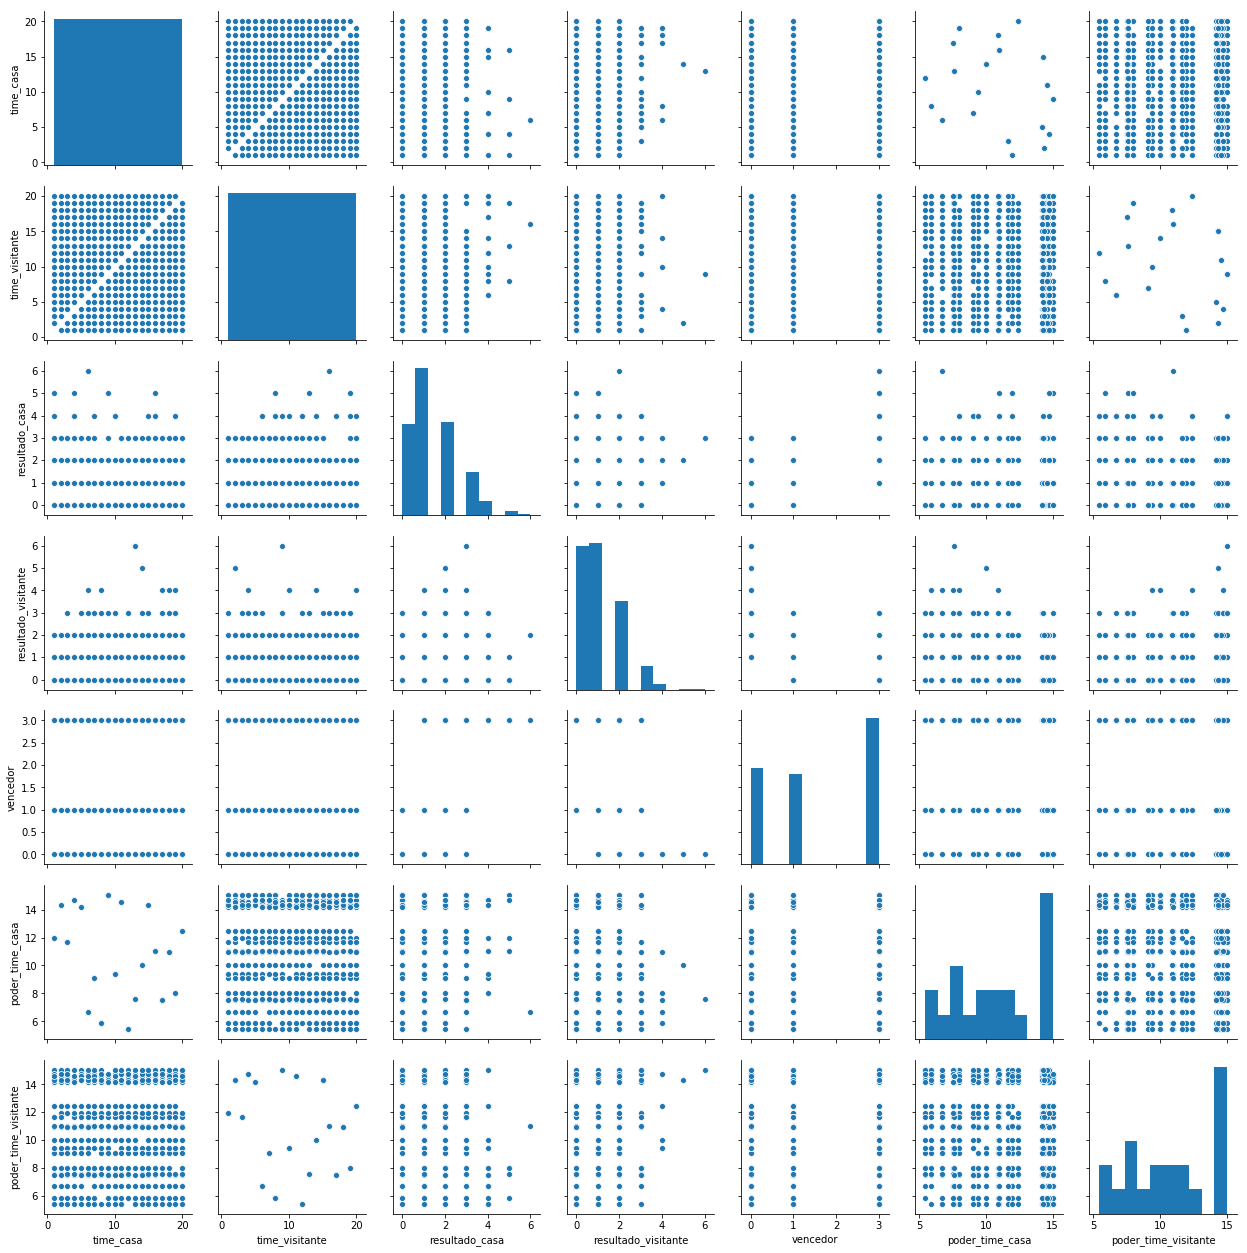

In [19]:
sns.pairplot(df)

# Train Test Split

In [20]:
y=df['vencedor']

In [21]:
X=df[['time_casa','time_visitante','poder_time_casa','poder_time_visitante'] ]

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)

# Logistic Regression

In [23]:
log_reg=LogisticRegression(n_jobs=-1,solver='newton-cg',multi_class='multinomial')

In [24]:
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=-1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
y_pred=log_reg.predict(X_test)

In [26]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#print("Precision:",metrics.precision_score(y_test, y_pred))
#print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.45263157894736844


With only two possibilites of prediction the log get's an accuracy of 56%
With only three possibilites of prediction the log get's an accuracy of 39%


In [38]:
y_pred

array([3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 3, 0, 0, 3], dtype=int64)

# Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=1,splitter='best')

In [29]:
clf = clf.fit(X_train,y_train)

In [30]:
y_pred_2 = clf.predict(X_test)

In [31]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_2))

Accuracy: 0.4105263157894737


# Random Forest

In [32]:
#create a new random forest classifier
rf = RandomForestClassifier(n_jobs=-1)
#create a dictionary of all values we want to test for n_estimators
params_rf = {'n_estimators': [50, 100, 200,300,400,500]}
#use gridsearch to test all values for n_estimators
rf_gs = GridSearchCV(rf, params_rf, cv=5)
#fit model to training data
rf_gs.fit(X_train, y_train)
#save best model
rf_best = rf_gs.best_estimator_
#check best n_estimators value
print(rf_gs.best_params_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 300}


In [33]:
y_pred_3=rf_best.predict(X_test)

In [34]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_3))

Accuracy: 0.28421052631578947


With only two possibilites of prediction the RF get's an accuracy of 47%
With three 30%

# KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier
#create new a knn model
knn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
params_knn = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gs = GridSearchCV(knn, params_knn, cv=5)
#fit model to training data
knn_gs.fit(X_train, y_train)
#save best model
knn_best = knn_gs.best_estimator_
#check best n_neigbors value
print(knn_gs.best_params_)

{'n_neighbors': 16}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [36]:
y_pred_4=knn_best.predict(X_test)

In [37]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_4))

Accuracy: 0.43157894736842106


With only two possibilites of prediction the KNN get's an accuracy of 52%
With three 37.5%

# XDBOOST

In [ ]:
import xgboost as xgb

In [ ]:
#param = {'max_depth': 2, 'eta': 1, 'silent': 1, 'objective': 'binary:logistic'}
#param['nthread'] = 4
#param['eval_metric'] = 'auc'
#num_round = 10
#evallist = [(X_test, 'eval'), (X_train, 'train')]

In [ ]:
xboost=xgb.XGBModel(n_jobs=-1,learning_rate=0.01,max_depth=5)

In [ ]:
xboost.fit(X_train,y_train)

In [ ]:
y_pred_5=xboost.predict(X_test)

In [ ]:
y.evals_result()